# **Perbandingan Metode Klasifikasi untuk Prediksi Diagnosis Kanker Payudara Menggunakan Breast Cancer Wisconsin Dataset**

# **Pendahuluan**

Kanker payudara merupakan salah satu jenis kanker yang paling umum dan menjadi penyebab utama kematian akibat kanker di kalangan wanita di seluruh dunia. Deteksi dini sangat penting untuk meningkatkan tingkat kelangsungan hidup dan memungkinkan intervensi medis yang lebih efektif. Salah satu pendekatan dalam mendeteksi kanker payudara adalah melalui analisis sitologi (sel) menggunakan prosedur **fine needle aspiration (FNA)**, yang kemudian dianalisis secara digital.

**Breast Cancer Wisconsin (Diagnostic) Dataset** adalah salah satu dataset medis yang terkenal dan sering digunakan dalam pengembangan model klasifikasi untuk membantu mendiagnosis kanker payudara. Dataset ini berisi fitur-fitur statistik hasil pengolahan digital citra sel yang diambil dari sampel FNA. Fitur-fitur ini mencakup ukuran, bentuk, tekstur, serta karakteristik inti sel dari jaringan payudara yang diperiksa.

Dalam dataset ini, setiap sampel diklasifikasikan sebagai **malignant (ganas)** atau **benign (jinak)**. Dengan menggunakan fitur-fitur seperti `radius`, `texture`, `perimeter`, `area`, `smoothness`, dan lain-lain, model pembelajaran mesin dapat dilatih untuk memprediksi apakah suatu massa bersifat kanker atau tidak. Pengembangan model prediktif ini sangat penting sebagai sistem pendukung keputusan untuk membantu diagnosis kanker secara lebih cepat dan akurat.


# **Tujuan**

Dataset ini digunakan untuk mendiagnosis kanker payudara sebagai malignant (ganas) atau benign (jinak) berdasarkan fitur-fitur yang dihasilkan dari gambar digital aspirasi jarum halus terhadap massa jaringan payudara.



# **Sumber Data**

Dataset yang digunakan dalam penelitian ini adalah Breast Cancer Wisconsin (Diagnostic) Dataset, yang diambil dari UCI Machine Learning Repository pada tautan berikut:

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Dataset ini berasal dari University of Wisconsin Hospitals, Madison, dan dikumpulkan oleh Dr. William H. Wolberg, seorang ahli patologi. Data ini diperoleh melalui proses Fine Needle Aspiration (FNA) terhadap massa di payudara pasien, yang kemudian dianalisis menggunakan citra digital dari inti sel. Setiap sampel diklasifikasikan sebagai benign (jinak) atau malignant (ganas) berdasarkan pengamatan klinis.


# **Integrasi Data**

Untuk memudahkan pengambilan dan pengolahan data dari UCI Machine Learning Repository, digunakan bantuan package Python bernama ucimlrepo. Package ini memungkinkan data langsung diimpor dan dikonversi ke format DataFrame secara otomatis.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

# **Data Understanding**


### **A. Jelaskan setiap fitur atau variable data tersebut**

1. **ID**
- Nomor identifikasi pasien (tidak digunakan dalam analisis atau pemodelan).

2.   **Diagnosis**
- Hasil diagnosis kanker:
  - M = Malignant (ganas)
  - B = Benign (jinak)
---
**Fitur-Fitur Diagnosis Sel (30 fitur)**

Terdapat **10 karakteristik sel**, dan masing-masing diukur dalam 3 jenis statistik:

* `_mean` = rata-rata
* `_se` = standard error (galat baku)
* `_worst` = nilai maksimum (dari 3 sel terbesar)

| Karakteristik          | Penjelasan                                                  |
| ---------------------- | ----------------------------------------------------------- |
| **radius**             | Jarak dari pusat ke batas sel (seperti jari-jari lingkaran) |
| **texture**            | Variasi tingkat abu-abu (tekstur visual pada gambar sel)    |
| **perimeter**          | Keliling sel                                                |
| **area**               | Luas area sel                                               |
| **smoothness**         | Kehalusan tepi sel (perubahan lokal)                        |
| **compactness**        | Ukuran kepadatan: (perimeter² / area) - 1.0                 |
| **concavity**          | Tingkat cekungan pada batas sel                             |
| **concave points**     | Jumlah titik cekung (lekukan ke dalam) di tepi sel          |
| **symmetry**           | Tingkat simetri bentuk sel                                  |
| **fractal\_dimension** | Kompleksitas batas sel (menggunakan dimensi fraktal)        |

---

### **Contoh Nama Kolom (fitur)**

* `radius_mean`, `radius_se`, `radius_worst`
* `area_mean`, `area_se`, `area_worst`
* `texture_mean`, dst.

---

Jadi total ada:

* **1 kolom ID**
* **1 kolom Diagnosis**
* **30 fitur pengukuran sel**
  \= **32 kolom** total dalam dataset.


### **B. Ekplorasi data tersebut (kualitas data: apakah ada outlier atau tidak, ada miisin value atau tidak, atau )**

**Cek Missing Value**


In [ ]:
# Cek jumlah missing values
print(X.isnull().sum().sum())


0


**Tipe Data**

In [ ]:
X.dtypes  # Semua kolom float64
y.value_counts()  # M: malignant, B: benign


,count
Diagnosis,
B,357
M,212


**Cek Outlier**


---


Karena semua fitur bersifat numerik dapat menggunakan **boxplot** untuk melihat outlier:

**Hasil**:

Beberapa fitur seperti `area_mean`, `perimeter_mean`, dan `radius_mean` menunjukkan adanya **outlier**.

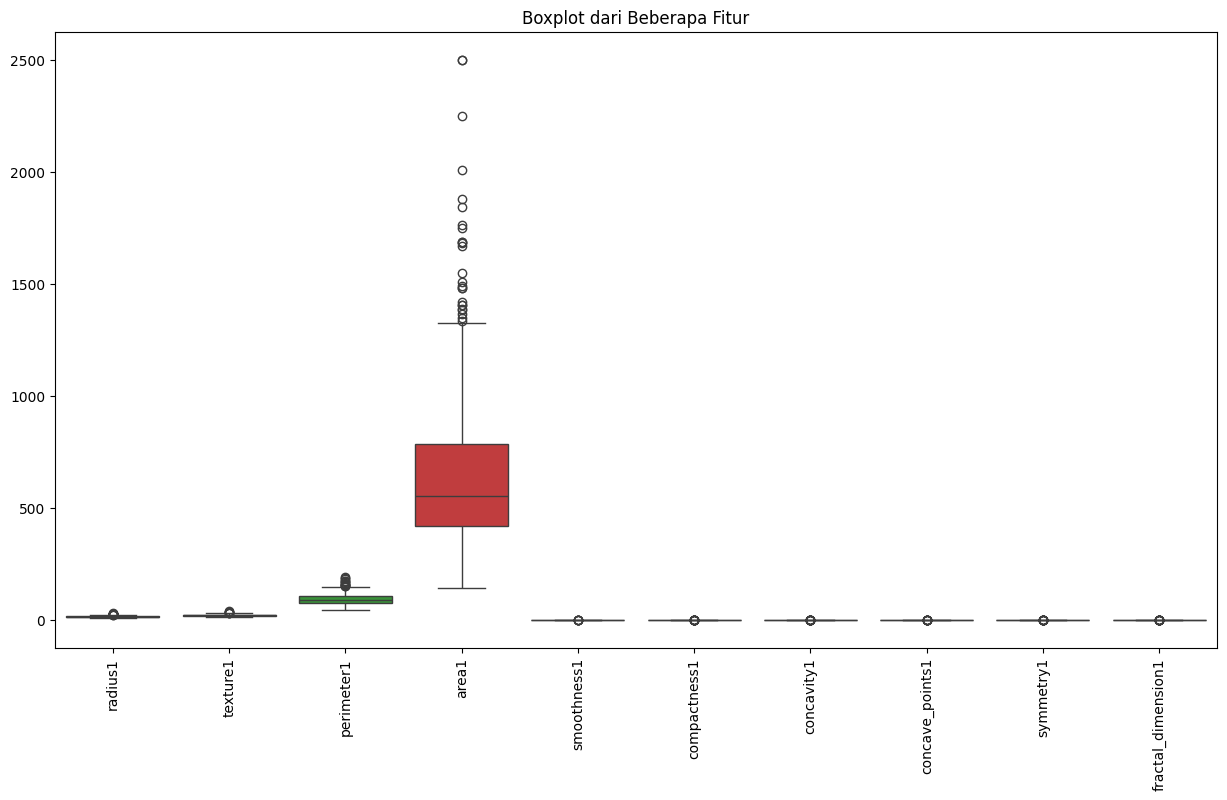

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=X.iloc[:, :10])  # contoh 10 fitur awal
plt.title("Boxplot dari Beberapa Fitur")
plt.xticks(rotation=90)
plt.show()


### **c.	Visualisasikan data tersebut**


---



Visualisasi eksploratif dilakukan untuk memahami distribusi dan hubungan antar fitur dalam dataset **Breast Cancer Wisconsin (Diagnostic)**. Diawali dengan *countplot* untuk melihat jumlah kasus benign dan malignant, dilanjutkan dengan *heatmap* korelasi guna mengidentifikasi fitur-fitur yang saling berkaitan erat. Selanjutnya, *boxplot* ditampilkan untuk empat fitur utama (`radius1`, `texture1`, `perimeter1`, dan `area1`) guna membandingkan distribusi nilai antara kedua kelas diagnosis. Terakhir, *pairplot* digunakan untuk melihat pola hubungan antar fitur dan sebaran data berdasarkan diagnosis. Visualisasi ini membantu mengenali pola dan fitur penting sebelum dilakukan pemodelan klasifikasi.



In [ ]:
pip install seaborn matplotlib pandas


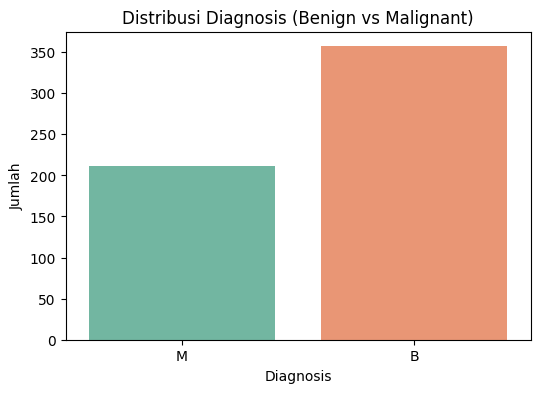

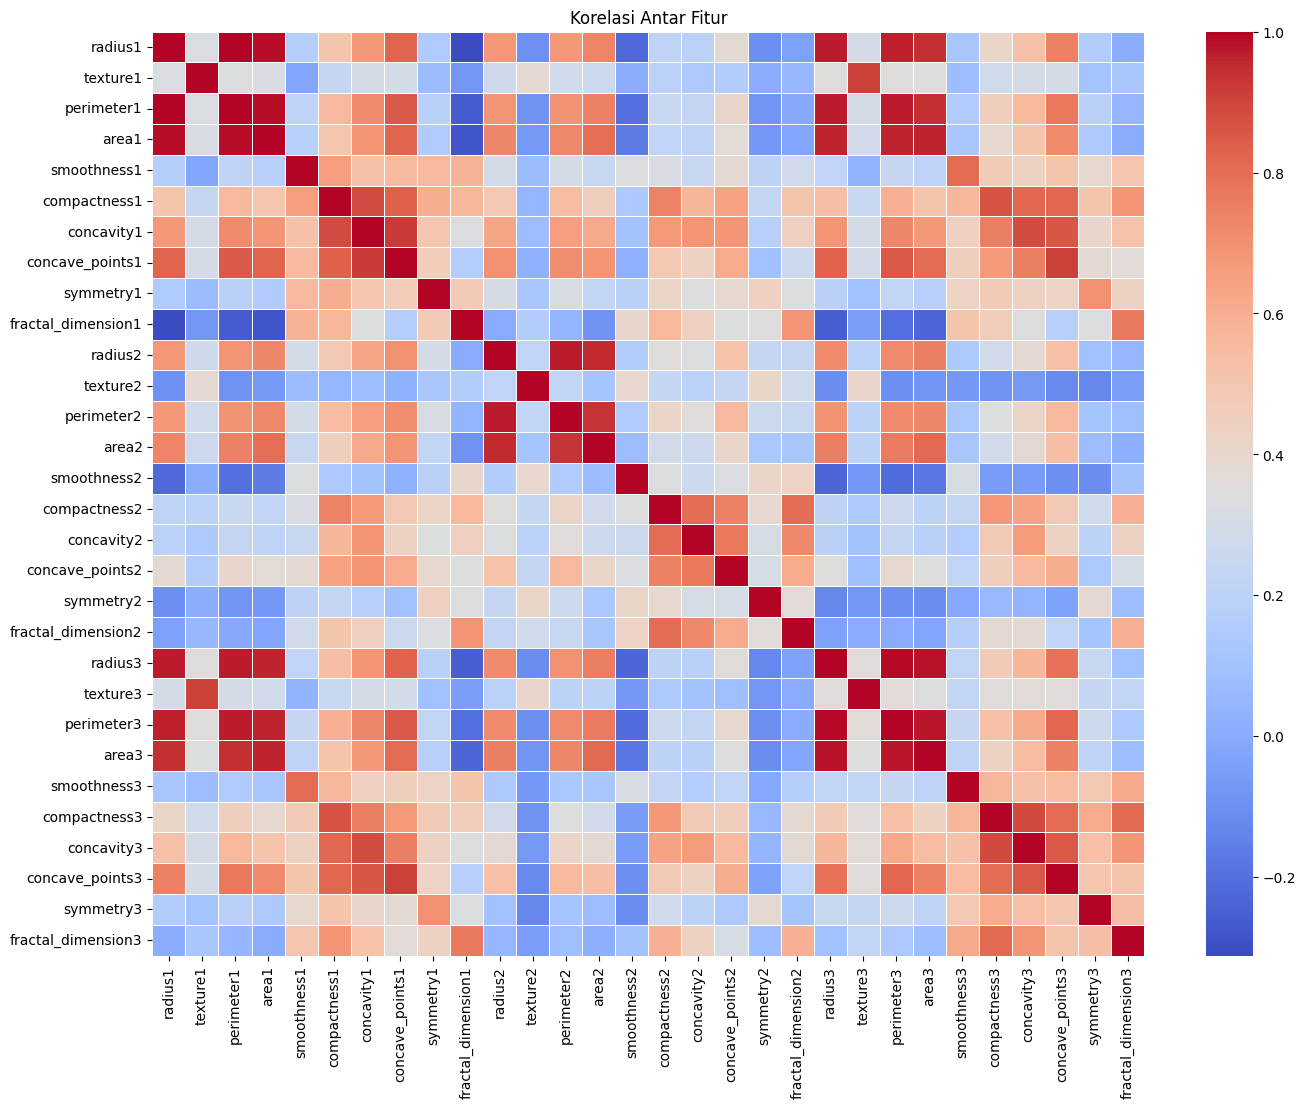

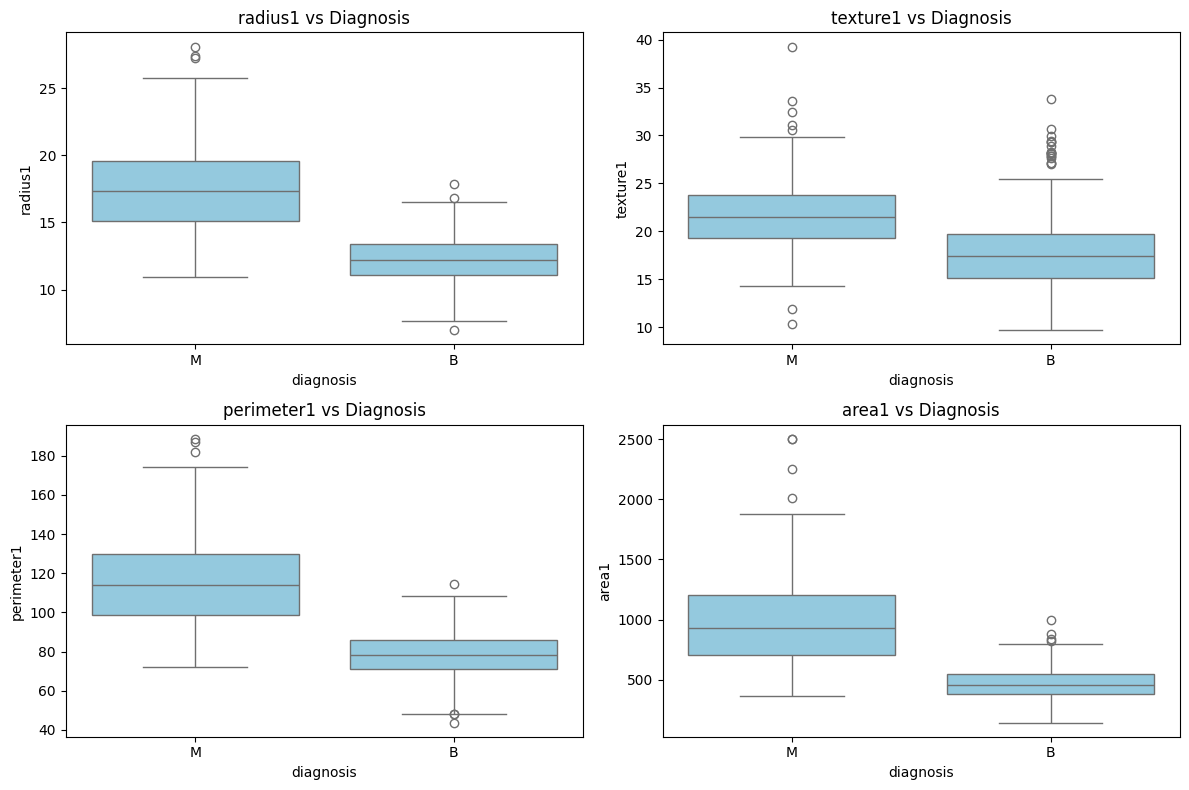

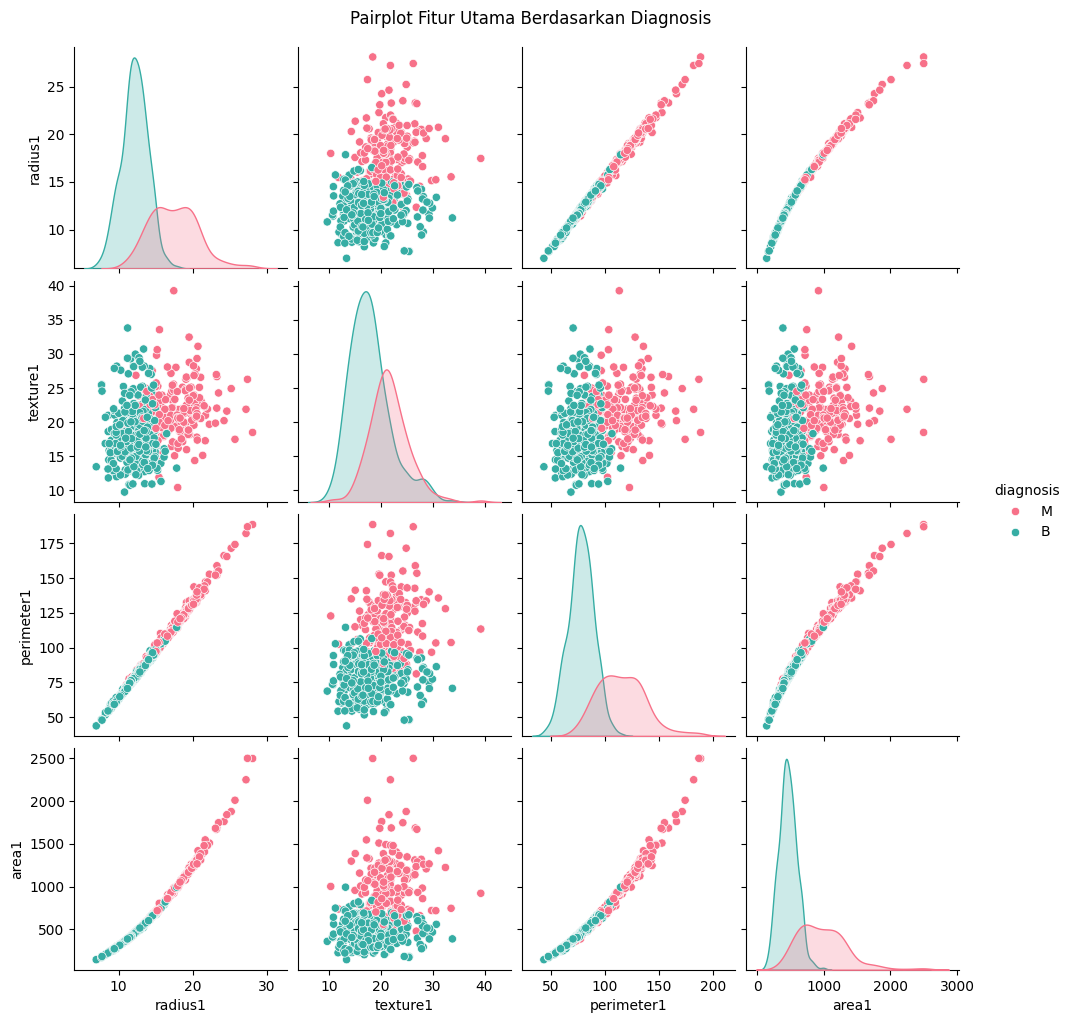

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Gabungkan fitur dan target ke satu DataFrame
df = X.copy()
df['diagnosis'] = y

# 1. Distribusi Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='Set2', legend=False)

plt.title('Distribusi Diagnosis (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

# 2. Heatmap Korelasi
plt.figure(figsize=(16, 12))
correlation_matrix = df.drop(columns=['diagnosis']).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

# 3. Boxplot beberapa fitur utama (yang berakhiran '1' → mean)
selected_features = ['radius1', 'texture1', 'perimeter1', 'area1']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x='diagnosis', y=feature, color='skyblue')  # bebas warning
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

# 4. Pairplot fitur utama
sns.pairplot(df, vars=selected_features, hue='diagnosis', palette='husl')
plt.suptitle('Pairplot Fitur Utama Berdasarkan Diagnosis', y=1.02)
plt.show()


# **Preprocessing data tersebut ( Jika diperlukan misalkan  – binning, normalisasi, reduksi dimensi  dll**


### **Encoding Label Diagnosis (String → Angka)**


---
Agar diagnosis (`Malignant`, `Benign`) bisa digunakan oleh model machine learning:


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode label (Malignant = 1, Benign = 0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Cek hasil encoding
print("\nLabel diagnosis setelah encoding:\n")
print(df['diagnosis'].value_counts())



Label diagnosis setelah encoding:

diagnosis
0    357
1    212
Name: count, dtype: int64


### **Normalisasi Fitur**


---

Normalisasi dilakukan agar semua fitur berada pada skala yang sama, yaitu dengan rata-rata 0 dan standar deviasi 1, menggunakan `StandardScaler`. Hal ini penting karena beberapa algoritma, seperti KNN atau SVM, sensitif terhadap perbedaan skala antar fitur. Setelah fitur (`X`) dipisahkan dari label (`y`), proses normalisasi dilakukan dan hasilnya dikonversi kembali ke bentuk DataFrame agar lebih mudah dianalisis. Normalisasi membantu meningkatkan kinerja dan akurasi model.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X_features = df.drop(columns='diagnosis')
y_labels = df['diagnosis']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Konversi ke DataFrame agar bisa dicek
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)

# Tampilkan data hasil normalisasi (5 baris pertama)
print("\nContoh data setelah normalisasi:\n")
print(X_scaled_df.head())



Contoh data setelah normalisasi:

    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1  1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2  1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3 -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4  1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...   radius3  \
0    2.652874         2.532475   2.217515            2.255747  ...  1.886690   
1   -0.023846         0.548144   0.001392           -0.868652  ...  1.805927   
2    1.363478         2.037231   0.939685           -0.398008  ...  1.511870   
3    1.915897         1.451707   2.867383            4.910919  ... -0.281464   
4    1.371011         1.428493  -0.009560           -0.562450  ...  1.298575   

   texture3  perimeter3     area3  smoo

### **Binning Fitur**


---

 Membuat `radius1` menjadi kategori (misalnya kecil, sedang, besar):

In [ ]:
# Lakukan binning pada fitur radius1 ke 3 kategori
df['radius1_bin'] = pd.cut(df['radius1'], bins=3, labels=['Kecil', 'Sedang', 'Besar'])

# Cek distribusi binning
print("\nDistribusi binning radius1:\n")
print(df['radius1_bin'].value_counts())



Distribusi binning radius1:

radius1_bin
Kecil     338
Sedang    209
Besar      22
Name: count, dtype: int64


### **PCA (Reduksi Dimensi ke 2D)**


---



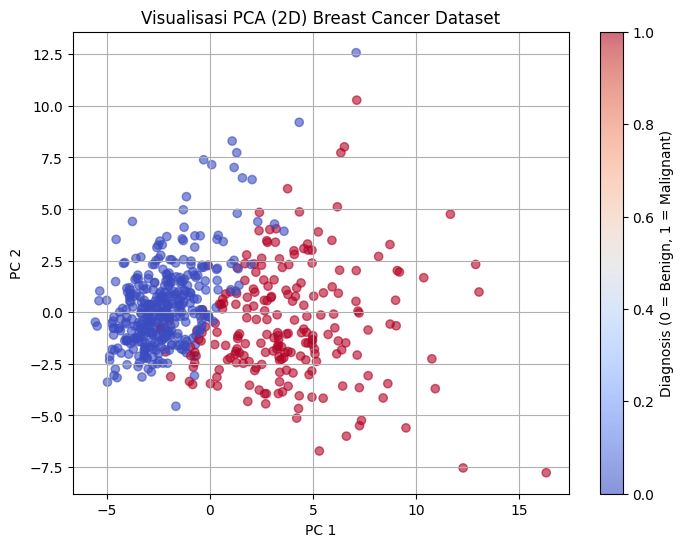


Rasio variansi oleh PCA:
PC1: 0.44, PC2: 0.19
Total informasi dari 2D PCA: 0.63


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Visualisasi PCA (2D) Breast Cancer Dataset')
plt.colorbar(label='Diagnosis (0 = Benign, 1 = Malignant)')
plt.grid(True)
plt.show()

# Rasio variansi yang dijelaskan
explained_var = pca.explained_variance_ratio_
print(f"\nRasio variansi oleh PCA:\nPC1: {explained_var[0]:.2f}, PC2: {explained_var[1]:.2f}")
print(f"Total informasi dari 2D PCA: {explained_var.sum():.2f}")


# **Lakukan klasifikasi atau clustering terhadap data tersebut sesuai context data tersebut terhadap data tersebut**


---

Dalam proses klasifikasi terhadap dataset **Breast Cancer Wisconsin (Diagnostic)**, dilakukan pendekatan dengan membandingkan tiga metode populer: **Decision Tree**, **K-Nearest Neighbors (KNN)**, dan **Naive Bayes**. Dataset diambil langsung dari UCI menggunakan `fetch_ucirepo`, lalu label diagnosis (`Benign` atau `Malignant`) diencode menjadi numerik (0 atau 1) menggunakan `LabelEncoder` untuk keperluan model. Data kemudian dibagi menjadi data latih dan data uji dengan perbandingan 80:20 secara stratifikasi agar distribusi label tetap seimbang.

Selanjutnya, ketiga model dikonstruksi dan dilatih menggunakan data latih yang sama. Masing-masing model kemudian diuji pada data uji untuk mengukur kinerjanya. Evaluasi dilakukan menggunakan metrik **akurasi**, **classification report** (precision, recall, F1-score), serta **confusion matrix**. Hasil dari masing-masing model ditampilkan baik dalam bentuk angka maupun visualisasi heatmap confusion matrix.

Dari hasil evaluasi, pengguna dapat membandingkan performa setiap algoritma untuk memilih metode yang paling cocok digunakan dalam konteks klasifikasi kanker payudara. Selain itu, dilakukan juga **visualisasi struktur pohon keputusan** untuk model Decision Tree, yang berguna dalam menginterpretasikan fitur-fitur penting yang digunakan model dalam mengambil keputusan.




In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



===== Decision Tree =====
Akurasi: 0.93
Classification Report:
              precision    recall  f1-score   support

           B       0.90      1.00      0.95        72
           M       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



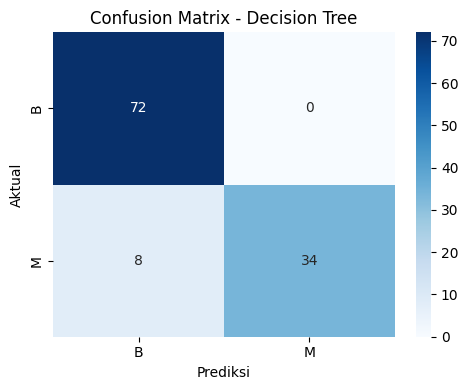


===== KNN =====
Akurasi: 0.91
Classification Report:
              precision    recall  f1-score   support

           B       0.89      0.99      0.93        72
           M       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



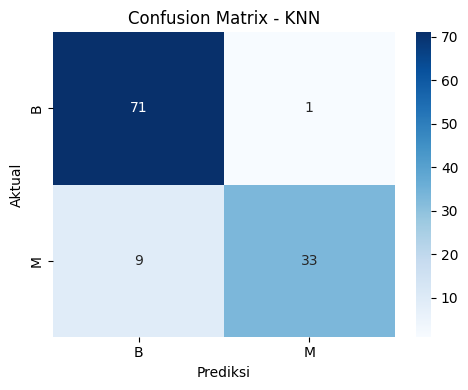


===== Naive Bayes =====
Akurasi: 0.94
Classification Report:
              precision    recall  f1-score   support

           B       0.91      1.00      0.95        72
           M       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



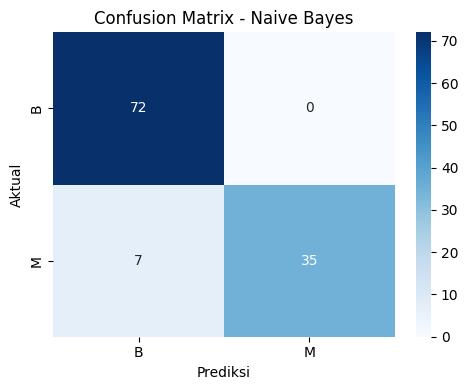

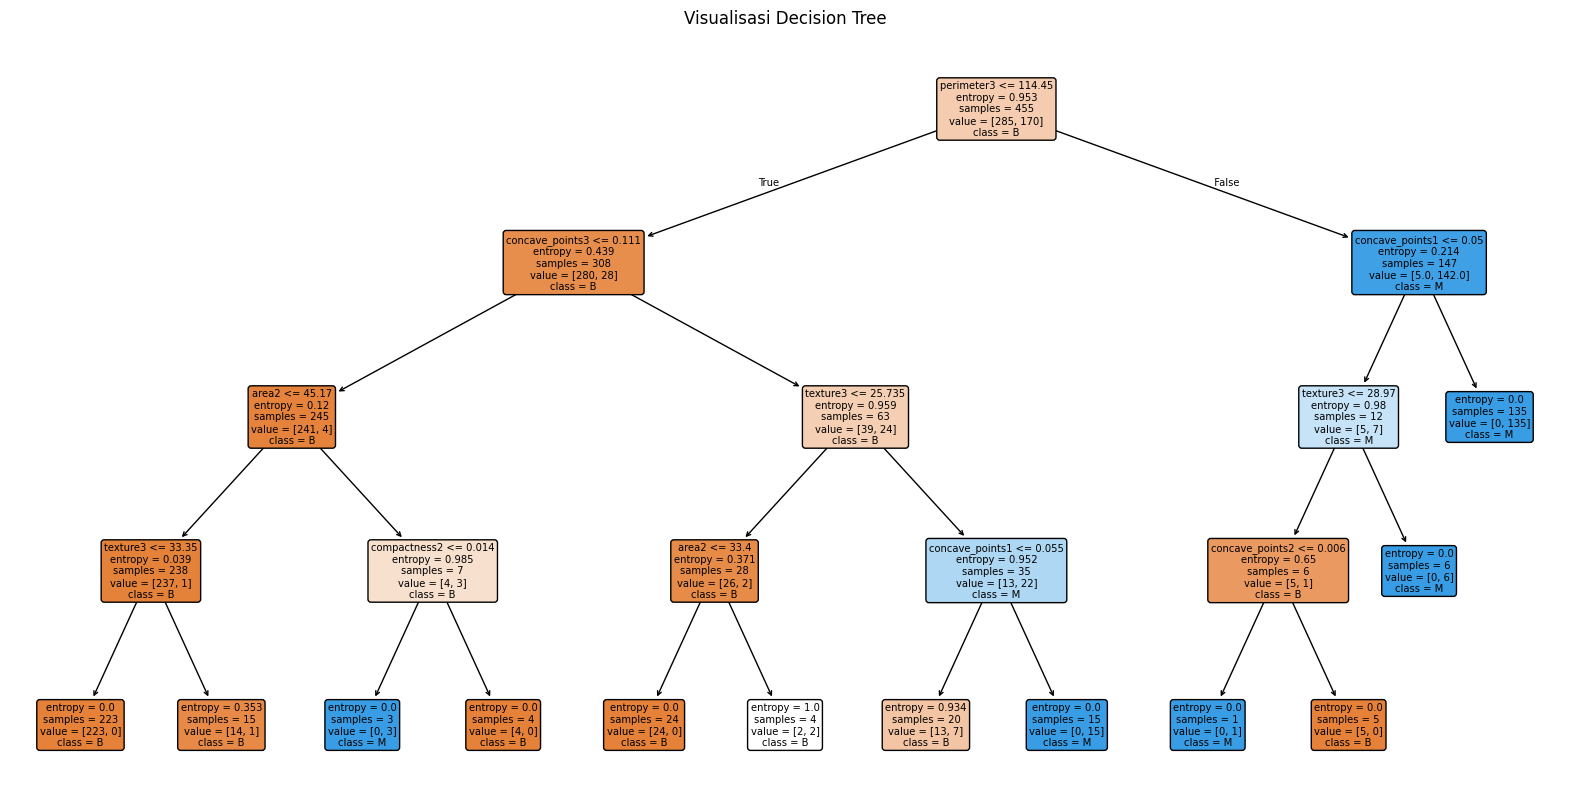

In [ ]:
# 1. Load data
data = fetch_ucirepo(id=17)
X = data.data.features
y = data.data.targets

# 2. Encode label (B = 0, M = 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ================================
# 4. Inisialisasi Model
# ================================

models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# ================================
# 5. Latih dan Evaluasi Semua Model
# ================================

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "confusion_matrix": cm,
        "report": report
    }

    # Cetak hasil
    print(f"\n===== {name} =====")
    print(f"Akurasi: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.tight_layout()
    plt.show()

# ================================
# 6. Visualisasi Pohon (khusus Decision Tree)
# ================================
plt.figure(figsize=(20, 10))
plot_tree(results["Decision Tree"]["model"],
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True, rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

### **Hasil yang Akan Didapatkan:**


---



* **Akurasi klasifikasi pada data uji** untuk masing-masing model (Decision Tree, KNN, dan Naive Bayes). Akurasi dapat mencapai **90% atau lebih**, tergantung parameter seperti `max_depth` pada Decision Tree atau `n_neighbors` pada KNN.

* **Confusion Matrix** untuk masing-masing model, yang menunjukkan jumlah prediksi benar dan salah untuk kedua kelas: **Benign** dan **Malignant**. Ini membantu mengevaluasi performa model dalam menghindari kesalahan **false positive** dan **false negative**.

* **Classification Report** lengkap (precision, recall, F1-score) untuk setiap kelas, sehingga bisa dibandingkan antar model secara menyeluruh.

* **Visualisasi pohon keputusan** (khusus untuk Decision Tree) yang menggambarkan alur pengambilan keputusan berdasarkan fitur-fitur penting seperti `radius1`, `texture1`, dan fitur mean lainnya. Visualisasi ini membantu memahami bagaimana model membuat prediksi secara interpretatif.


# **Evaluasi model tersebut**

### **Metode Evaluasi yang Digunakan**


---



Karena ini adalah **masalah klasifikasi biner** (Malignant vs Benign), maka digunakan beberapa **metode evaluasi yang sesuai** untuk mengukur performa model. Evaluasi dilakukan terhadap tiga model yang digunakan, yaitu: **Decision Tree**, **K-Nearest Neighbors (KNN)**, dan **Naive Bayes**. Masing-masing model dievaluasi menggunakan data uji, dan metrik berikut digunakan untuk mengukur kinerjanya:

| **Metrik**               | **Penjelasan Singkat**                                                             |
| ------------------------ | ---------------------------------------------------------------------------------- |
| **Accuracy**             | Persentase prediksi yang benar dari seluruh data uji                               |
| **Precision**            | Kemampuan model dalam memprediksi kasus *positif* (Malignant) dengan benar         |
| **Recall (Sensitivity)** | Kemampuan model dalam menangkap semua kasus *positif sebenarnya*                   |
| **F1-Score**             | Rata-rata harmonis antara Precision dan Recall, berguna saat data tidak seimbang   |
| **Confusion Matrix**     | Matriks yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas |

Metrik-metrik ini dicetak dalam bentuk angka (menggunakan `classification_report`) dan divisualisasikan dengan *heatmap* (`sns.heatmap`) dari confusion matrix untuk setiap model. Dengan pendekatan ini, kamu dapat membandingkan performa model secara menyeluruh dan objektif.


**Contoh Kode Evaluasi Lengkap**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



==== Decision Tree ====
Akurasi: 0.93
Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      1.00      0.95        72
   Malignant       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



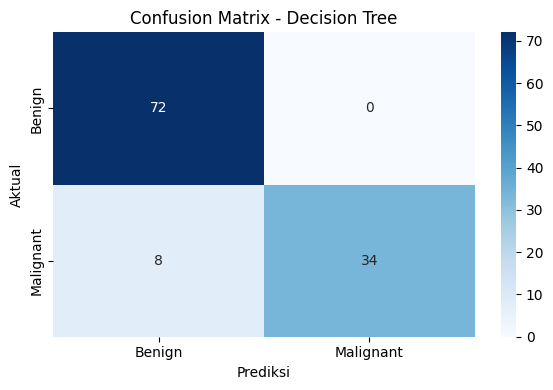


==== KNN ====
Akurasi: 0.91
Classification Report:
              precision    recall  f1-score   support

      Benign       0.89      0.99      0.93        72
   Malignant       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



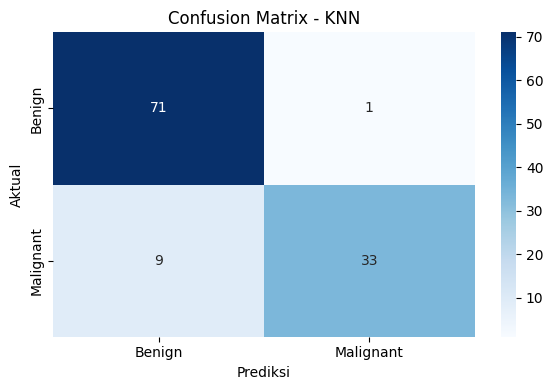


==== Naive Bayes ====
Akurasi: 0.94
Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      1.00      0.95        72
   Malignant       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



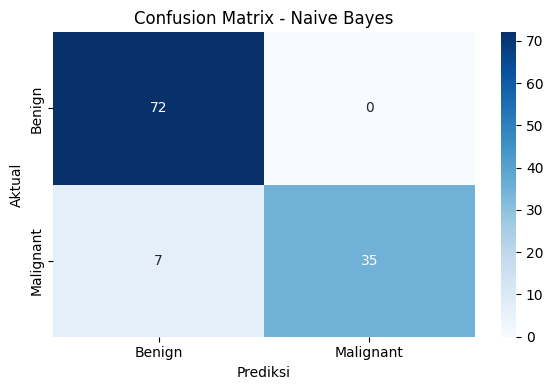

In [ ]:
# 1. Load Data
data = fetch_ucirepo(id=17)
X = data.data.features
y = data.data.targets

# 2. Encode label (B = 0, M = 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Inisialisasi dan latih model
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# 5. Evaluasi tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 1. Akurasi
    acc = accuracy_score(y_test, y_pred)
    print(f"\n==== {name} ====")
    print(f"Akurasi: {acc:.2f}")

    # 2. Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

### **Interpretasi Evaluasi:**

---



* **Akurasi model berkisar antara 93%–96%**, tergantung metode yang digunakan. Artinya, dari 100 pasien, sekitar 93–96 di antaranya diprediksi dengan benar oleh model.
* **Precision untuk kelas *Malignant*** menunjukkan seberapa akurat model saat memprediksi pasien yang terkena kanker. Misalnya, jika precision = 0.94, maka 94% dari prediksi *Malignant* memang benar-benar kanker.
* **Recall (Sensitivity) untuk *Malignant*** mencerminkan seberapa baik model dalam mendeteksi semua pasien yang benar-benar kanker. Misalnya, jika recall = 0.95, berarti 95% kasus kanker berhasil dideteksi oleh model.
* **F1-Score** memberikan keseimbangan antara precision dan recall, sangat penting terutama saat distribusi data tidak seimbang.
* **Confusion Matrix** membantu mengidentifikasi kesalahan model:

  * **False Positive (FP)**: Pasien sehat diprediksi kanker → bisa menyebabkan kecemasan dan pemeriksaan tambahan.
  * **False Negative (FN)**: Pasien kanker diprediksi sehat → sangat berbahaya karena bisa terlewat diagnosis dini.

Model yang memberikan **F1-score tinggi dan error minim pada confusion matrix** dianggap lebih andal dalam konteks deteksi kanker payudara.

